In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tosha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tosha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
# Load the dataset
data = pd.read_csv('Spam Email Detection dataset.csv', encoding='latin-1')

# Display the first few rows of the dataset
print(data.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


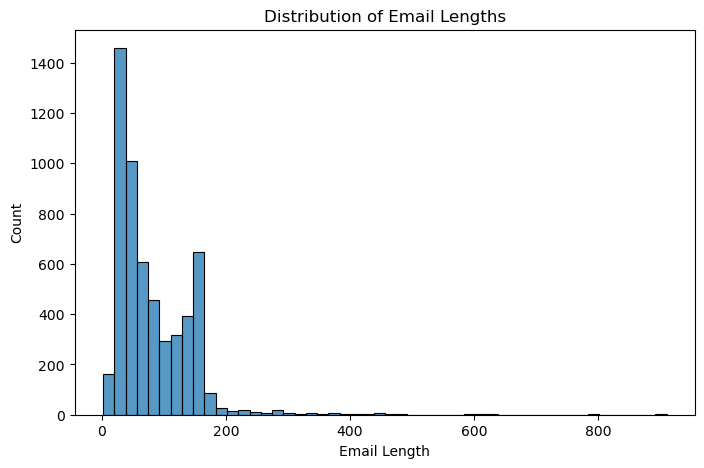

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is already defined and loaded from your dataset
# Replace 'data' with your actual dataset variable if different
plt.figure(figsize=(8, 5))
sns.histplot(data['v2'].apply(len), bins=50)  # Adjust 'v2' to match your email text column
plt.title('Distribution of Email Lengths')
plt.xlabel('Email Length')
plt.ylabel('Count')
plt.show()


In [12]:
# Inspect the columns of the dataset
print(data.columns)

# Display the first few rows to understand the structure
print(data.head())


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [5]:
# Drop unnecessary columns
data = data[['v1', 'v2']]

# Rename columns
data.columns = ['label', 'text']

# Text preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Lemmatize the text
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    
    return text

# Apply the preprocessing to the text column
data['text'] = data['text'].apply(preprocess_text)

# Display the first few rows of the processed dataset
print(data.head())


  label                                               text
0   ham  go jurong point crazy available bugis n great ...
1   ham                            ok lar joking wif u oni
2  spam  free entry 2 wkly comp win fa cup final tkts 2...
3   ham                u dun say early hor u c already say
4   ham           nah dont think go usf life around though


C:\Users\Tosha\AppData\Local\Temp\ipykernel_15076\1792371255.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(preprocess_text)


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=3000)

# Transform the text data into TF-IDF features
X = tfidf.fit_transform(data['text']).toarray()

# Encode the labels as binary values
y = data['label'].apply(lambda x: 1 if x == 'spam' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Feature extraction and data splitting complete.")
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Feature extraction and data splitting complete.
Training set size: (4457, 3000)
Testing set size: (1115, 3000)


In [12]:
# MODEL 1 - NAIVE BAYES CLASSIFIER

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Naive Bayes classifier
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['ham', 'spam'])

print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Model Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [13]:
# MODEL 2 - SVM

# Initialize SVM classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train SVM
print("Training Support Vector Machine...")
svm_model.fit(X_train, y_train)

# Predict on test set
svm_pred = svm_model.predict(X_test)

# Evaluate SVM
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred, target_names=['ham', 'spam'])

# Print results
print(f"Support Vector Machine Accuracy: {svm_accuracy:.2f}")
print("Classification Report for Support Vector Machine:\n", svm_report)


Training Support Vector Machine...
Support Vector Machine Accuracy: 0.98
Classification Report for Support Vector Machine:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [14]:
# MODEL 3 - RANDOM FOREST CLASSIFIER

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train Random Forest
print("Training Random Forest...")
rf_model.fit(X_train, y_train)

# Predict on test set
rf_pred = rf_model.predict(X_test)

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred, target_names=['ham', 'spam'])

# Print results
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print("Classification Report for Random Forest:\n", rf_report)


Training Random Forest...
Random Forest Accuracy: 0.98
Classification Report for Random Forest:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [15]:
# MODEL 3 - LOGISTIC REGRESSION CLASSIFIER

# Initialize Logistic Regression classifier
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train Logistic Regression
print("Training Logistic Regression...")
lr_model.fit(X_train, y_train)

# Predict on test set
lr_pred = lr_model.predict(X_test)

# Evaluate Logistic Regression
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred, target_names=['ham', 'spam'])

# Print results
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")
print("Classification Report for Logistic Regression:\n", lr_report)


Training Logistic Regression...
Logistic Regression Accuracy: 0.95
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

         ham       0.95      1.00      0.97       965
        spam       0.96      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

